<a href="https://colab.research.google.com/github/wozzin/AI/blob/main/mL_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 가져오기
from sklearn.datasets import load_iris
import sklearn.datasets

iris_dataset = load_iris()
print( type(iris_dataset) )
print( iris_dataset.keys() )
# print( iris_dataset.DESCR )
print( iris_dataset.target_names )
print( iris_dataset.target )
print( type(iris_dataset.target) )
print( iris_dataset.target.shape )

print( iris_dataset.data.shape )
print( iris_dataset.data[:3] )

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150,)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [44]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [36]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b2d8e105ecbc4c9a79d7bb6df72641cc031efce8e34f09717bbe07b313800014
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b326b0950>,
      dtype=object)

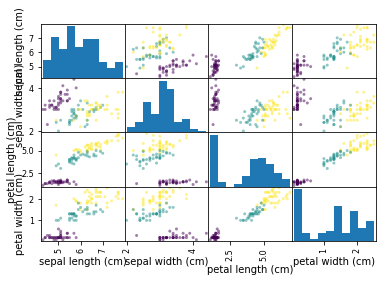

In [10]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train)


In [16]:
# seaborn 사용하기

# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading
iris =sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split


In [21]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [18]:

X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

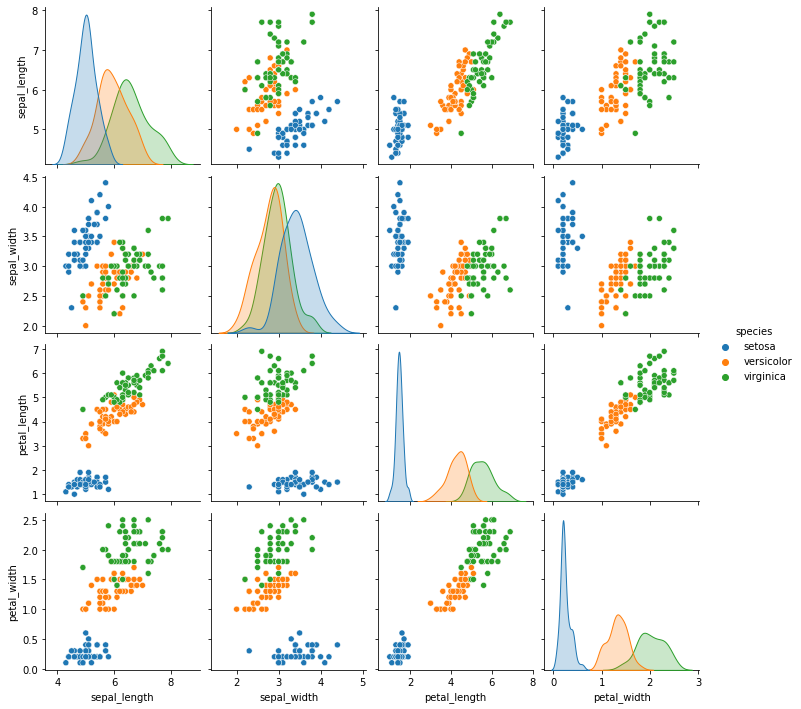

In [19]:
sns.pairplot(iris, hue='species')

In [23]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
ac_score

0.9736842105263158

In [30]:
# 예측하기
import numpy as np

X_new = [ [5, 2.9, 1, 0.2] ]
# np.array ([ [5, 2.9, 1, 0.2] ])
pre = model.predict(X_new)
pre

array(['setosa'], dtype=object)

In [34]:
import platform
from matplotlib import font_manager, rc 
import matplotlib


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


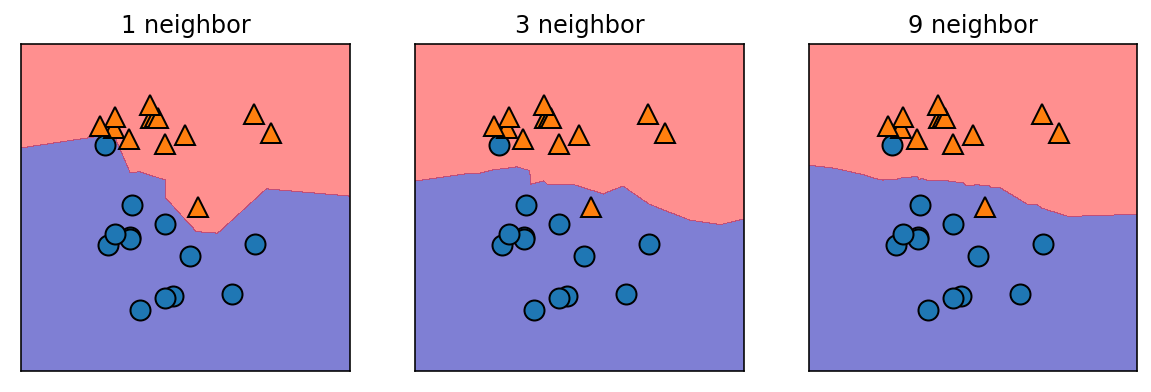

In [45]:
# KNeighborsClassifier 분석
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax, fill=True, alpha=0.5)

  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

  ax.set_title(f'{n} neighbor')